# Example of workflow
Here, we reproduce some results obtained in [This article](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004571). We start from the .zginml model that can be downloaded [here](https://doi.org/10.1371/journal.pcbi.1004571.s017) (SuppMat_models/SuppMat_Model_Master_Model.zginml)

In [1]:
import maboss
import ginsim
import pypint

You are using Pint version 2017-09-25 and pypint 1.3.1

API is documented at https://loicpauleve.name/pint/doc/api.html

### Loading the model in the api
Go to MaBoSS -> load network (zginml format). And replace the argument of the first function by the loaction of you .zginml file.

In [2]:
m = ginsim.open("/model/Master_Model.zginml")
ginsim.service("maboss").export(m, "mybndfile.bnd")
master_simulation = maboss.load_file("mybndfile.bnd")

### Setting the simulation parameters
#### Setting initial states
To quickly modify the initial states of several nodes, you can use the widgets `wg_set_istate`. Go to MaBoSS -> network -> set istate.

In [3]:
#maboss.wg_set_istate(master_simulation.network)
nodes = ('Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest', 'p21', 'CDH1', 'CDH2', 'VIM', 'TWIST1', 'SNAI1', 'SNAI2', 'ZEB1', 'ZEB2', 'AKT1', 'DKK1', 'CTNNB1', 'NICD', 'p63', 'p53', 'p73', 'miR200', 'miR203', 'miR34', 'AKT2', 'ERK', 'SMAD')
istate = [1, 0]
for nd in nodes:
    master_simulation.network.set_istate(nd, istate)

In [4]:
#maboss.wg_set_istate(master_simulation.network)
nodes = ('ECMicroenv', 'DNAdamage', 'GF', 'TGFbeta')
istate = [0.5, 0.5]
for nd in nodes:
    master_simulation.network.set_istate(nd, istate)

In [5]:
#maboss.wg_set_istate(master_simulation.network)
nodes = ('miR200', 'miR203', 'miR34')
istate = [0, 1]
for nd in nodes:
    master_simulation.network.set_istate(nd, istate)

#### Setting output
You can use the widget `wg_set_output` to set the output of the simulation (MaBoSS -> Simulation -> Set output).

In [6]:
#maboss.wg_set_output(master_simulation)
master_simulation.network.set_output(('Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest'))

#### Setting other parameters
To modify other parameters of the simulation, you can use the method `update_parameters` of the simulation object.

In [7]:
master_simulation.update_parameters(discrete_time=0, use_physrandgen=0,
                                    seed_pseudorandom=100, sample_count=50000,
                                    max_time=50, time_tick=0.1, thread_count=4,
                                    statdist_traj_count=100, statdist_cluster_threshold=0.9)

## Runing simulation
Runing the simulation will create a `Result` object that holds the results of the simulation. You can quickly write the line below by going to MaBoSS -> Simulation -> run

In [8]:
master_results = master_simulation.run()

MaBoSS ended successfuly


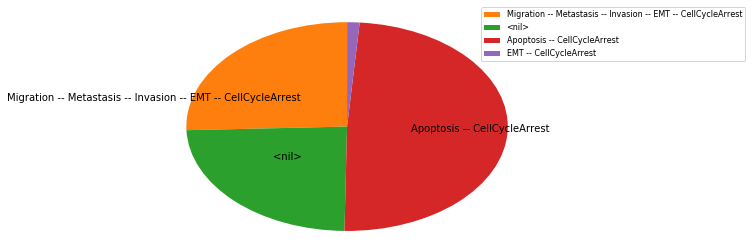

In [9]:
fig = master_results.plot_piechart()
fig

{'<nil>', 'Metastasis', 'Apoptosis', 'EMT', 'CellCycleArrest', 'Migration', 'Invasion'}


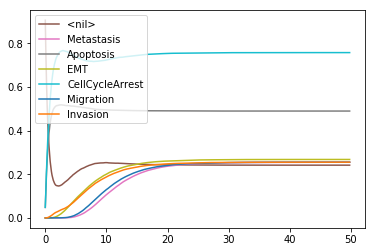

In [10]:
master_results.plot_node_trajectory()

In [11]:
test = {'EMT', 'Metastasis -- Invasion', 'Migration -- Metastasis -- Invasion', 'Invasion -- EMT', 'Migration -- Invasion -- EMT -- Apoptosis -- CellCycleArrest', 'EMT -- CellCycleArrest', 'CellCycleArrest', 'Metastasis -- Invasion -- CellCycleArrest', 'Metastasis -- Invasion -- EMT -- CellCycleArrest', 'Migration -- Metastasis -- EMT', 'Metastasis -- Invasion -- EMT -- Apoptosis -- CellCycleArrest', 'Migration -- Metastasis -- CellCycleArrest', 'Invasion -- EMT -- CellCycleArrest', 'Migration -- Metastasis -- EMT -- CellCycleArrest', 'Metastasis -- Apoptosis', 'Apoptosis -- CellCycleArrest', 'Metastasis -- EMT -- Apoptosis -- CellCycleArrest', 'Metastasis -- EMT', 'Migration -- EMT', 'Invasion', 'Migration -- Invasion -- EMT -- Apoptosis', 'Migration -- Invasion -- CellCycleArrest', 'Metastasis -- Invasion -- EMT', 'Migration -- Metastasis -- Invasion -- EMT -- CellCycleArrest', 'Invasion -- Apoptosis -- CellCycleArrest', 'Metastasis -- CellCycleArrest', 'EMT -- Apoptosis', 'Migration -- Invasion', 'Migration -- CellCycleArrest', 'Invasion -- EMT -- Apoptosis -- CellCycleArrest', '<nil>', 'Invasion -- Apoptosis', 'Migration -- Invasion -- EMT', 'Migration -- EMT -- Apoptosis', 'Metastasis -- EMT -- CellCycleArrest', 'Migration -- Metastasis -- Invasion -- EMT -- Apoptosis', 'Migration -- Metastasis -- Invasion -- EMT -- Apoptosis -- CellCycleArrest', 'Invasion -- EMT -- Apoptosis', 'Apoptosis', 'Migration -- Metastasis -- EMT -- Apoptosis', 'Metastasis -- EMT -- Apoptosis', 'EMT -- Apoptosis -- CellCycleArrest', 'Migration -- Metastasis -- Invasion -- EMT', 'Migration', 'Invasion -- CellCycleArrest', 'Migration -- EMT -- CellCycleArrest', 'Migration -- Metastasis -- Invasion -- CellCycleArrest', 'Migration -- Metastasis', 'Migration -- Metastasis -- Apoptosis', 'Metastasis', 'Migration -- Invasion -- EMT -- CellCycleArrest'}


In [12]:
for s in test:
    for nd in (s.split(' -- ')): print(nd)

Migration
Metastasis
Invasion
CellCycleArrest
Metastasis
Invasion
EMT
Apoptosis
CellCycleArrest
Migration
Metastasis
Invasion
EMT
CellCycleArrest
Migration
Metastasis
Invasion
EMT
Apoptosis
Migration
EMT
Migration
Metastasis
Invasion
Migration
Metastasis
EMT
Metastasis
EMT
Apoptosis
CellCycleArrest
Metastasis
Invasion
EMT
Invasion
EMT
Apoptosis
CellCycleArrest
Migration
EMT
Apoptosis
Invasion
EMT
Invasion
Metastasis
CellCycleArrest
<nil>
Migration
Invasion
EMT
Apoptosis
Migration
Metastasis
CellCycleArrest
Migration
Metastasis
EMT
Apoptosis
Migration
Metastasis
Apoptosis
Migration
Invasion
Migration
CellCycleArrest
Migration
Metastasis
Metastasis
Invasion
Invasion
Apoptosis
CellCycleArrest
CellCycleArrest
Metastasis
Invasion
CellCycleArrest
Migration
Metastasis
Invasion
EMT
Apoptosis
CellCycleArrest
Metastasis
EMT
Apoptosis
Invasion
EMT
CellCycleArrest
Metastasis
Invasion
EMT
CellCycleArrest
Migration
Migration
EMT
CellCycleArrest
Apoptosis
Invasion
EMT
Apoptosis
Migration
Metastasis
I

In [13]:
model = pypint.load("/model/Master_Model.zginml")

Source file is in zginml format, importing with GINsim

Simplifying model...

/notebook/pyMaBoSS/gen/colomotoixl8pnv1Master_Model.an

1 state(s) have been registered: initState_1

In [14]:
maboss.widgets.network.wg_transfer_istate(master_simulation.network, model)

{'ECMicroenv': (0, 1), 'DNAdamage': (0, 1), 'GF': (0, 1), 'TGFbeta': (0, 1), 'Metastasis': 0, 'Migration': 0, 'Invasion': 0, 'EMT': 0, 'Apoptosis': 0, 'CellCycleArrest': 0, 'p21': 0, 'CDH1': 0, 'CDH2': 0, 'VIM': 0, 'TWIST1': 0, 'SNAI1': 0, 'SNAI2': 0, 'ZEB1': 0, 'ZEB2': 0, 'AKT1': 0, 'DKK1': 0, 'CTNNB1': 0, 'NICD': 0, 'p63': 0, 'p53': 0, 'p73': 0, 'miR200': 1, 'miR203': 1, 'miR34': 1, 'AKT2': 0, 'ERK': 0, 'SMAD': 0}


In [15]:
model.oneshot_mutations_for_cut(Metastasis=1, exclude={"DNAdamage", "ECMicroenv"})

This computation is an *under-approximation*: returned mutations are all valid, but they may be non-minimal, and some solutions may be missed.

Limiting solutions to mutations of at most 5 automata. Use `maxsize` argument to change.

[{'Migration': 0},
 {'Invasion': 0},
 {'EMT': 0},
 {'CDH1': 1},
 {'CDH2': 0},
 {'VIM': 0},
 {'TWIST1': 0},
 {'AKT1': 1},
 {'p63': 1},
 {'p53': 1},
 {'p73': 1},
 {'miR200': 1},
 {'miR203': 1},
 {'miR34': 1},
 {'AKT2': 0},
 {'ERK': 0},
 {'CDH2': 1, 'TGFbeta': 0},
 {'DKK1': 1, 'TGFbeta': 0},
 {'CTNNB1': 0, 'TGFbeta': 0},
 {'CDH2': 1, 'ZEB2': 0},
 {'CDH2': 1, 'NICD': 0},
 {'CDH2': 1, 'SMAD': 0},
 {'DKK1': 1, 'ZEB2': 0},
 {'CTNNB1': 0, 'ZEB2': 0},
 {'DKK1': 1, 'NICD': 0},
 {'DKK1': 1, 'SMAD': 0},
 {'CTNNB1': 0, 'NICD': 0},
 {'CTNNB1': 0, 'SMAD': 0}]

In [16]:
master_results._fpfig = None

   FP    Proba                                              State  ECMicroenv  \
0  #1  0.00666  ECMicroenv -- DNAdamage -- GF -- CDH2 -- NICD ...           1   
1  #2  0.12452  DNAdamage -- CDH1 -- miR200 -- p53 -- Apoptosi...           0   
2  #3  0.01094  GF -- CDH2 -- EMT -- VIM -- AKT2 -- ERK -- ZEB...           0   
3  #4  0.24190                                               CDH1           0   
4  #5  0.24884  ECMicroenv -- GF -- CDH2 -- NICD -- TGFbeta --...           1   
5  #6  0.11752  ECMicroenv -- DNAdamage -- CDH1 -- TGFbeta -- ...           1   
6  #7  0.12624  ECMicroenv -- DNAdamage -- CDH1 -- TGFbeta -- ...           1   
7  #8  0.12176  DNAdamage -- CDH1 -- p63 -- miR200 -- p73 -- A...           0   
8  #9  0.00160  DNAdamage -- GF -- CDH2 -- EMT -- VIM -- AKT2 ...           0   

   DNAdamage  GF  CDH1  CDH2  CTNNB1  NICD  ...   miR34  Apoptosis  p21  \
0          1   1     0     1       0     1  ...       0          0    0   
1          1   0     1     0       0   

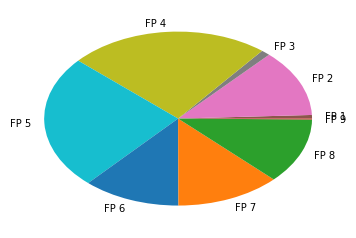

In [17]:
master_results.plot_fixpoint()